# Calcium Imaging in SMA and M1 of Macaques - Exploratory Analysis
This notebook provides an introduction to DANDI dataset **001174**, which contains calcium imaging data from supplementary motor area (SMA) and primary motor area (M1) of macaques performing reaching tasks or at rest.

**Note**: This notebook was AI-generated using `dandi-notebook-gen` and has not been fully verified. Use caution when interpreting results.

## Dataset Overview
- **Description**: The dataset includes one-photon calcium imaging and microendoscope recordings from deep layers of SMA and M1 in four rhesus macaques during rest or arm-reaching tasks. GCaMP6f was used to image calcium transients.
- **Species**: Macaca mulatta
- **License**: CC-BY-4.0
- **Keywords**: One-photon calcium imaging, non-human primates, microendoscope, reaching task

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in this Dandiset")

Found 45 assets in this Dandiset


## Exploring Sample NWB File
We'll examine a sample session from subject Q (`sub-Q_ses-20220922T131747_ophys.nwb`) containing calcium imaging during spontaneous activity.

In [2]:
# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file(
    "https://lindi.neurosift.org/dandi/dandisets/001174/assets/ac161d0e-7642-48bd-9bef-8eff59319d48/nwb.lindi.json"
)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic file metadata
print(f"Session description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Session start time: {nwb.session_start_time}")

Session description: Calcium imaging in SMA during the spontaneous condition
Subject ID: Q
Session start time: 2022-09-22 13:17:47.111000+00:00


## Calcium Imaging Data Structure
The NWB file contains:
- **OnePhotonSeries**: Raw imaging data (6030 frames at 10.01 Hz)
- **Fluorescence**: Processed traces for 38 ROIs (cells)
- **ImageSegmentation**: Spatial footprints of identified cells

In [3]:
# Examine OnePhotonSeries structure
one_photon = nwb.acquisition["OnePhotonSeries"]
print(f"Video data shape: {one_photon.data.shape} (frames, height, width)")
print(f"Frame rate: {one_photon.rate} Hz")

Video data shape: (6030, 320, 200) (frames, height, width)
Frame rate: 10.01 Hz


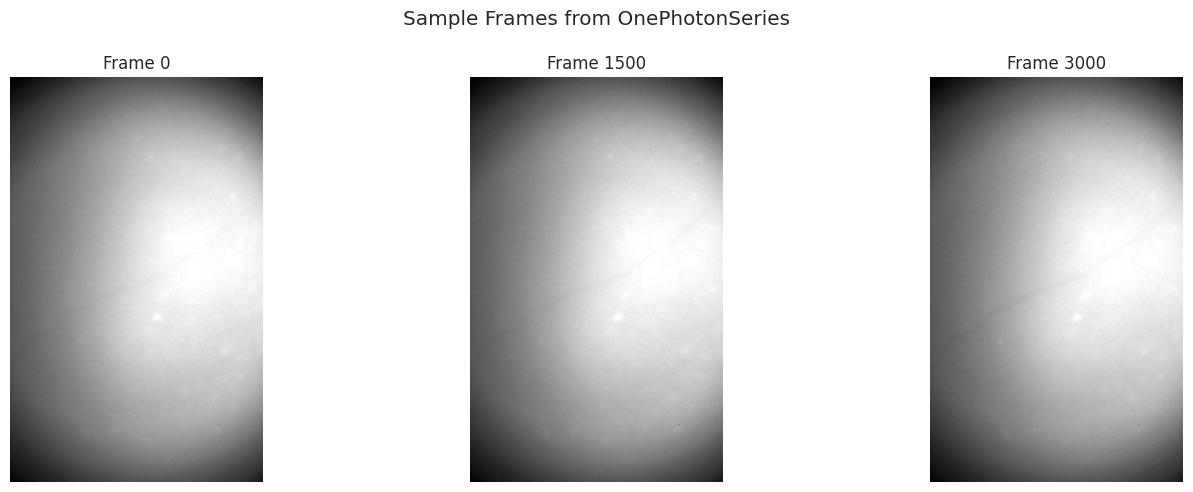

In [4]:
# Plot sample frames
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sample_indices = [0, 1500, 3000]  # Start, middle, end
for i, idx in enumerate(sample_indices):
    frame = one_photon.data[idx, :, :]
    axes[i].imshow(frame, cmap='gray', vmax=np.percentile(frame, 99))
    axes[i].set_title(f"Frame {idx}")
    axes[i].axis('off')
plt.suptitle("Sample Frames from OnePhotonSeries")
plt.tight_layout()
plt.show()

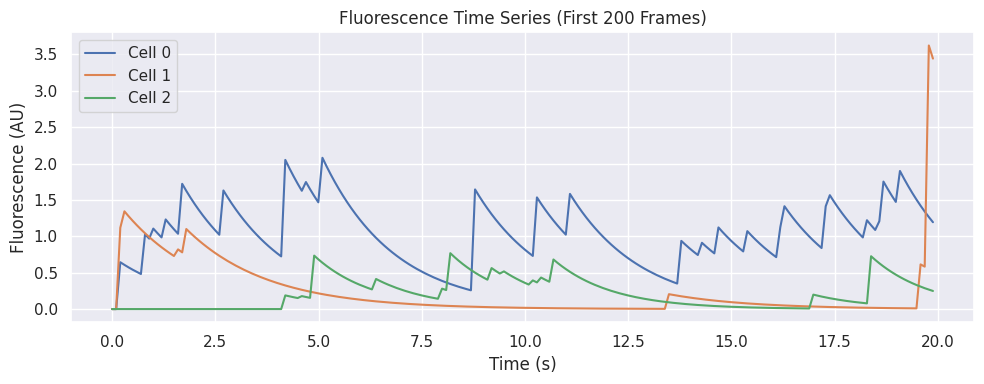

In [5]:
# Plot fluorescence traces for example cells
fluorescence = nwb.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
num_frames = 200
time = np.arange(num_frames) / one_photon.rate

plt.figure(figsize=(10, 4))
for cell in range(3):  # First 3 cells
    plt.plot(time, fluorescence.data[:num_frames, cell], label=f"Cell {cell}")
plt.xlabel("Time (s)")
plt.ylabel("Fluorescence (AU)")
plt.title("Fluorescence Time Series (First 200 Frames)")
plt.legend()
plt.tight_layout()
plt.show()

## Exploring Cellular Activity
We can examine spatial footprints and activity patterns across cells:

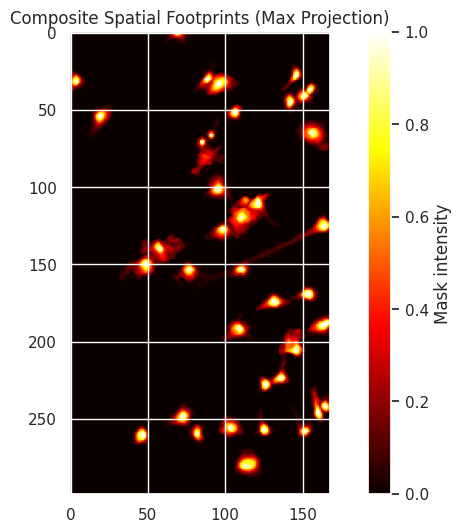

In [6]:
# Plot spatial footprints
segmentation = nwb.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"]
masks = segmentation["image_mask"].data[:]  # Load into memory

plt.figure(figsize=(10, 6))
plt.imshow(masks.max(axis=0), cmap='hot')
plt.title("Composite Spatial Footprints (Max Projection)")
plt.colorbar(label="Mask intensity")
plt.show()

## Next Steps for Analysis
This notebook demonstrates basic exploration of the dataset. Potential next steps include:
- Event detection in calcium traces
- Correlation analysis between cells
- Behavioral alignment (for task sessions)
- More sophisticated visualizations

**Important Note**: When working with large datasets, consider:
- Loading data in chunks to avoid memory issues
- Using DANDI's remote access features for initial exploration
- Downloading files locally for intensive analysis